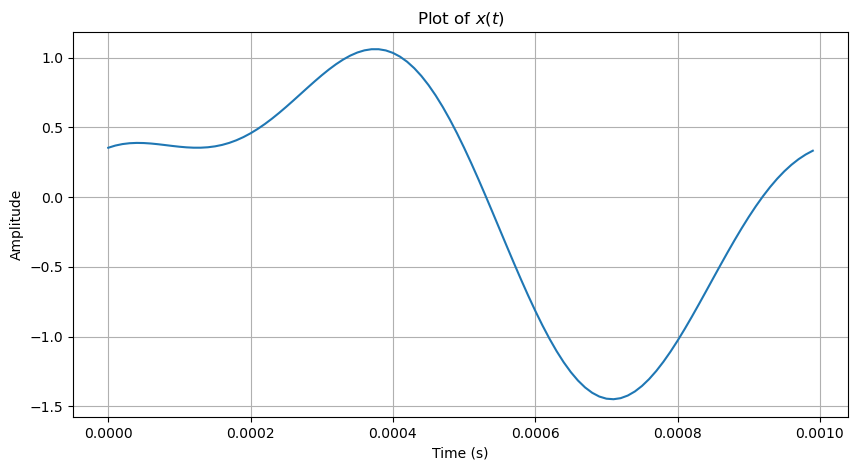

[-5.55111512e-17  5.55111512e-17  1.41421356e+00 -3.33066907e-16
  4.99600361e-16  1.72084569e-15  1.41421356e+00 -2.38697950e-15]


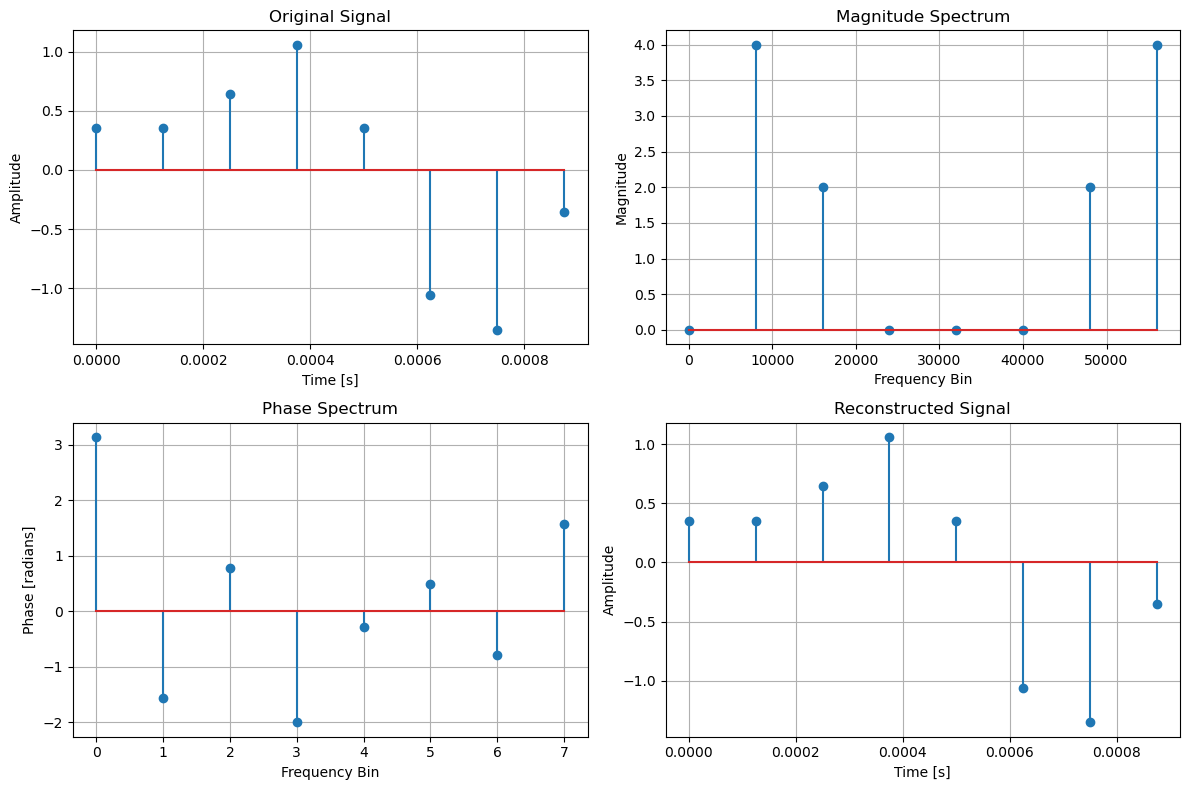

In [6]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(0, 0.001, 0.00001)
# Signal x(t)
x_t = np.sin(2*np.pi*1000*t) + 0.5*np.sin(2*np.pi*2000*t + 3*np.pi/4)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, x_t)
plt.title('Plot of $x(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Parameters
f1 = 1000  # Frequency of the first sine component
f2 = 2000  # Frequency of the second sine component
A1 = 1     # Amplitude of the first sine component
A2 = 0.5   # Amplitude of the second sine component
phi2 = 3 * np.pi / 4  # Phase of the second sine component

# Sampling rate and sampling period
fs = 8000  # Sampling rate (should be at least 2 * f2 to satisfy Nyquist)
T = 1 / fs # Sampling period
N = 8

# Time vector for 8 samples
t = np.arange(0, 8) * T
# Discrete signal
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t + phi2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.stem(t, x, use_line_collection=True)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Compute the 8-point DFT manually
X = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)


# Magnitude and phase spectra
magnitude_spectrum = np.abs(X)
plt.subplot(2, 2, 2)
plt.stem(np.arange(N) * 8000, magnitude_spectrum, use_line_collection=True)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

phase_spectrum = np.angle(X)
plt.subplot(2, 2, 3)
plt.stem(np.arange(N), phase_spectrum, use_line_collection=True)
plt.title('Phase Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Phase [radians]')
plt.grid(True)

# Compute the inverse DFT manually
x_reconstructed = np.zeros(N, dtype=complex)
for n in range(N):
    for k in range(N):
        x_reconstructed[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
x_reconstructed /= N

print(np.real(X))
plt.subplot(2, 2, 4)
plt.stem(t, np.real(x_reconstructed), use_line_collection=True)
plt.title('Reconstructed Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
